# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

In [1]:
import pandas as pd
import numpy as np
import math
import json


from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer
import seaborn as sns #For Data visualization
import matplotlib.pyplot as plt #Data plotting and visualization
sns.set_palette(sns.color_palette('Set2'))

%matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [2]:
from datetime import datetime
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer

In [3]:
#Import functions
from clean_data import clean_offertype, clean_profile, clean_transcript

### Rename Column: 

In [4]:
def rename_cols(df, new_col_names):
    """
    INPUT
    ----------
    df: input dataframe for renaming columns
    new_col_names: define new column name for each column
    
    OUTPUT
    -------
    df: output data frame with renamed column names
       
    """

    df= df.rename(columns = new_col_names)
    return df

In [5]:
#rename portfolio columns
new_col_names_portfolio = {'difficulty':'offer_difficulty' , 'id':'offer_id', 
                 'duration':'offer_duration', 'reward': 'offer_reward'}
portfolio  = rename_cols(portfolio, new_col_names_portfolio )


#rename profile columns
new_col_profile = {'id':'customer_id' , 'income':'customer_income'}
profile = rename_cols(profile, new_col_profile )


# Rename Transcript columns
new_col_transcript = {'person': 'customer_id'}
transcript = rename_cols(transcript, new_col_transcript)

## Portfolio: Data Exploration 

In [6]:
display(portfolio)

,offer_reward,channels,offer_difficulty,offer_duration,offer_type,offer_id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [7]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   offer_reward      10 non-null     int64 
 1   channels          10 non-null     object
 2   offer_difficulty  10 non-null     int64 
 3   offer_duration    10 non-null     int64 
 4   offer_type        10 non-null     object
 5   offer_id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [8]:
print('Dataset description:')
display(pd.DataFrame(portfolio.describe()))

Dataset description:


,offer_reward,offer_difficulty,offer_duration
count,10.000000,10.000000,10.000000
mean,4.200000,7.700000,6.500000
std,3.583915,5.831905,2.321398
min,0.000000,0.000000,3.000000
25%,2.000000,5.000000,5.000000
50%,4.000000,8.500000,7.000000
75%,5.000000,10.000000,7.000000
max,10.000000,20.000000,10.000000


## Profile: Data Exploration

In [9]:
profile

,gender,age,customer_id,became_member_on,customer_income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   customer_id       17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   customer_income   14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


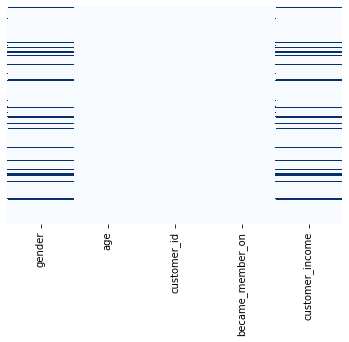

In [10]:
# Find and visualize Missing Data
sns.heatmap(profile.isnull(), yticklabels = False, cbar = False, cmap="Blues")

profile.info()

In [11]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   customer_id       17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   customer_income   14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [12]:
print(pd.DataFrame(profile['age'].describe()))
print('')
print(pd.DataFrame(profile['customer_income'].describe()))

                age
count  17000.000000
mean      62.531412
std       26.738580
min       18.000000
25%       45.000000
50%       58.000000
75%       73.000000
max      118.000000

       customer_income
count     14825.000000
mean      65404.991568
std       21598.299410
min       30000.000000
25%       49000.000000
50%       64000.000000
75%       80000.000000
max      120000.000000


<AxesSubplot:xlabel='age'>

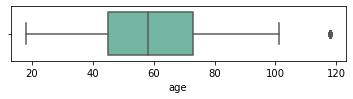

In [13]:
plt.figure(figsize=[6,1])
sns.boxplot(data=profile, x='age')

In [14]:
profile = profile[profile['customer_income'].notnull()]
print(profile.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               14825 non-null  int64  
 2   customer_id       14825 non-null  object 
 3   became_member_on  14825 non-null  int64  
 4   customer_income   14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 694.9+ KB
None


Median Age  : $ 55.0


Text(0.5, 1.0, 'Age Distribution')

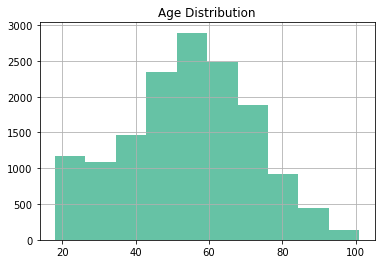

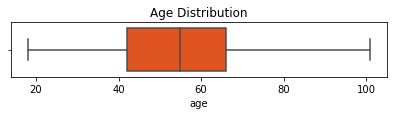

In [80]:
# Age Distributiobn:Histogram

profile['age'].hist(bins=10)

plt.title('Age Distribution')

#Age distribution: Box Plot

print("Median Age  : $",profile['age'].median())


plt.figure(figsize=[6.8,1])
sns.boxplot(data=profile, x='age', color = 'orangered' )
plt.title('Age Distribution')

Code Age in terms of Generation criteria:
- Gen Z: 18 – 25
- Millennials: 26 – 43
- Gen Xers: 44 – 56
- Boomers: 57 – 75
- Matures: 76+ ]


<ipython-input-18-0bc43cd3167b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profile['age_group'] = pd.cut(profile['age'], bins=[18, 26, 44, 57, 76, 101] , labels=labels, include_lowest=True)


Text(0.5, 1.0, 'Customer Age group')

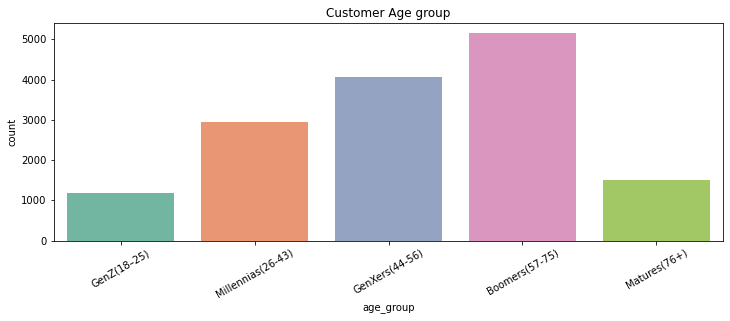

In [18]:
#Group the age ranges

labels = ['GenZ(18–25)', 'Millennias(26-43)', 'GenXers(44-56)',
                            'Boomers(57-75)', 'Matures(76+)']
profile['age_group'] = pd.cut(profile['age'], bins=[18, 26, 44, 57, 76, 101] , labels=labels, include_lowest=True)

fig = plt.figure(figsize = (12,4))
sns.countplot(x='age_group',data=profile)
plt.xticks(rotation=30)
plt.title('Customer Age group')

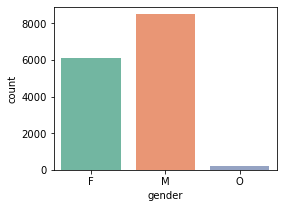

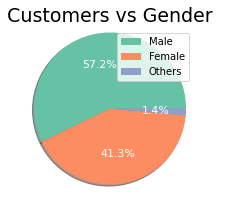

In [81]:
#Gender distribution

plt.figure(figsize=[4,3])
sns.countplot(data=profile, x='gender' )

#Gender Distribution in Percentage

gender = profile['gender'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(gender, labels=['Male', 'Female', 'Others'], shadow=True, autopct='%1.1f%%', 
            textprops={'color': "w", 'fontsize': 11})

plt.axis('equal')
plt.title('Customers vs Gender', fontsize=19)
plt.legend(loc='best')

In [64]:
#Analyze income:

profile['customer_income'].describe()


count     14825.000000
mean      65404.991568
std       21598.299410
min       30000.000000
25%       49000.000000
50%       64000.000000
75%       80000.000000
max      120000.000000
Name: customer_income, dtype: float64

Text(0.5, 0, 'Salary(USD)')

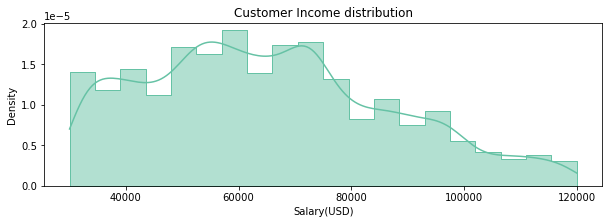

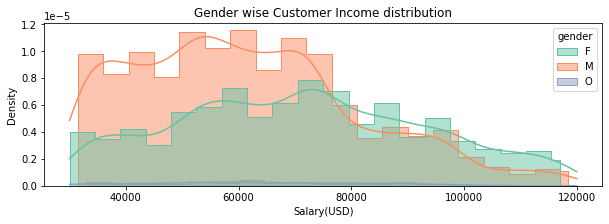

In [72]:
#Income distribution

plt.figure(figsize=[10,3])
sal_hist1 = sns.histplot(data = profile, x = 'customer_income',  multiple = "dodge",element = 'step', 
                        bins = 20, kde = True ,stat = 'density' ).set_title("Customer Income distribution")
plt.xlabel("Salary(USD)")

#Income distribution by gender

plt.figure(figsize=[10,3])
sal_hist = sns.histplot(data = profile, x = 'customer_income', hue = 'gender', 
                        multiple = "dodge",element = 'step', bins = 20, kde = True ,stat = 'density' ).set_title("Gender wise Customer Income distribution")
plt.xlabel("Salary(USD)")

In [66]:
#Median Income

print("Median Income  : $",profile['customer_income'].median())

print("Median Income for Males  : $",profile[profile['gender']=='M']['customer_income'].median())

print("Median Income Females : $",profile[profile['gender']=='F']['customer_income'].median())

Median Income  : $ 64000.0
Median Income for Males  : $ 59000.0
Median Income Females : $ 71000.0


## Transcript: Data Exploration

In [23]:
#Transcript Data
transcript.head(4)

,customer_id,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0


In [30]:
#Seperatng transaction and offer data from transcript dataframe
offers, transactions = clean_transcript(transcript)

,offerid,customer_id,time_in_days,completed,received,viewed,event,offer_reward,channels,offer_difficulty,offer_duration,offer_type,offer_id
0,9b98b8c7a33c4b65b9aebfe6a799e6d9,78afa995795e4d85b5d9ceeca43f5fef,0.0,0,1,0,offer received,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,9b98b8c7a33c4b65b9aebfe6a799e6d9,ebe7ef46ea6f4963a7dd49f501b26779,0.0,0,1,0,offer received,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9


In [32]:

offers.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 167581 entries, 0 to 306527
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   offerid       167581 non-null  object 
 1   customer_id   167581 non-null  object 
 2   time_in_days  167581 non-null  float64
 3   completed     167581 non-null  uint8  
 4   received      167581 non-null  uint8  
 5   viewed        167581 non-null  uint8  
 6   event         167581 non-null  object 
dtypes: float64(1), object(3), uint8(3)
memory usage: 6.9+ MB


In [34]:

transactions.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 138953 entries, 12654 to 306533
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   customer_id   138953 non-null  object 
 1   event         138953 non-null  object 
 2   time_in_days  138953 non-null  float64
 3   amount        138953 non-null  object 
dtypes: float64(1), object(3)
memory usage: 5.3+ MB


In [ ]:
offers_type = pd.merge(offers, portfolio, left_on='offerid', right_on='offer_id', how='outer')
offers_type.head(2)

[Text(0.5, 0, ''), Text(0, 0.5, 'Count'), Text(0.5, 1.0, 'Informational')]

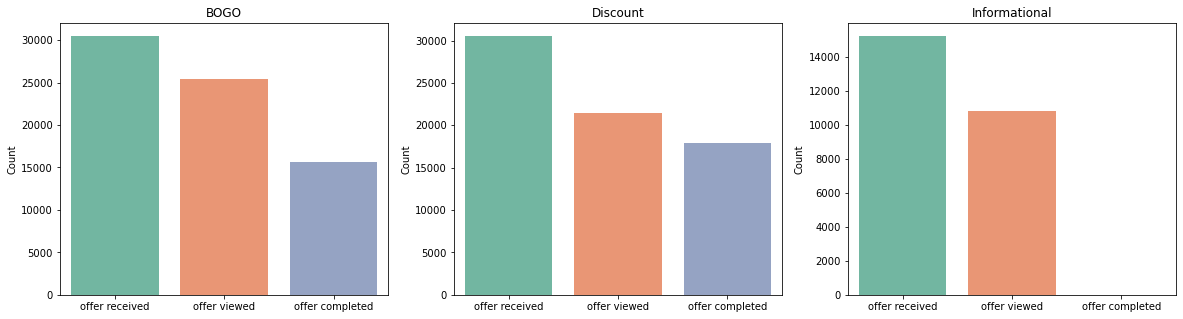

In [25]:
#Comparing offer recieved, viewed, completed by offer type

df_graph = offers_type.groupby(['event', 'offer_type'])['customer_id'].count().reset_index()
df_graph['event'] = pd.Categorical(df_graph['event'], ["offer received", "offer viewed", "offer completed"])

df_graph.sort_values('event', inplace = True)
df_graph = df_graph.rename(columns = {'customer_id':'customer_count'})

df_graph.sort_values('event', inplace=True)

fig, axs = plt.subplots(ncols=3, figsize=(20, 5))

sns.set_palette(sns.color_palette('Set2'))

ax = sns.barplot(x = 'event', y='customer_count', data=df_graph.query('offer_type == "bogo"'),ax=axs[0])
ax.set(xlabel='', ylabel='Count', title='BOGO')

ax = sns.barplot(x = 'event', y='customer_count', data=df_graph.query('offer_type == "discount"'),ax=axs[1])
ax.set(xlabel='', ylabel='Count', title='Discount')

ax = sns.barplot(x = 'event', y='customer_count', data=df_graph.query('offer_type == "informational"'), ax=axs[2])
ax.set(xlabel='', ylabel='Count', title='Informational')

#### Explore Transactions

In [26]:
transactions.head(5)

,customer_id,event,time_in_days,amount
12654,02c083884c7d45b39cc68e1314fec56c,transaction,0.0,0.83
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,0.0,34.56
12659,54890f68699049c2a04d415abc25e717,transaction,0.0,13.23
12670,b2f1cd155b864803ad8334cdf13c4bd2,transaction,0.0,19.51
12671,fe97aa22dd3e48c8b143116a8403dd52,transaction,0.0,18.97


In [27]:
pd.DataFrame(transactions['amount'].describe())

,amount
count,138953.00
unique,5103.00
top,0.05
freq,431.00


In [28]:
transcript_by_person = transactions.groupby('customer_id')
pd.DataFrame(transcript_by_person['amount'].count().describe())

,amount
count,16578.000000
mean,8.381771
std,5.009822
min,1.000000
25%,5.000000
50%,7.000000
75%,11.000000
max,36.000000


In [29]:
transcript_by_person